## 1-minute introduction to Jupyter ##

A Jupyter notebook consists of cells. Each cell contains either text or code.

A text cell will not have any text to the left of the cell. A code cell has `In [ ]:` to the left of the cell.

If the cell contains code, you can edit it. Press <kbd>Enter</kbd> to edit the selected cell. While editing the code, press <kbd>Enter</kbd> to create a new line, or <kbd>Shift</kbd>+<kbd>Enter</kbd> to run the code. If you are not editing the code, select a cell and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd> to run the code.

# Lesson 8a: Debugging tools

Oftentimes, a programmer may not be working in the best of conditions. They might not have access to a good keyboard, a fast computer, and asufficiently large screen. Those we cann't do much about.

More annoyingly, they may not have access to good tools: a good <b>i</b>ntegrated <b>d</b>evelopment <b>e</b>nvironment (**IDE**), and a useful debugger.

In such case, they must fall back on the oldest tools known to programmers: `print()` statements, paper, and pencil.

## Debugging with `print()` statements

The most basic tool a programmer has at their disposal is the humble `print()` statement.

At its most basic, you can get `print()` to just give you a value:

    print(value)
    
But in a longer piece of code, you might have multiple `print()` statements.

Let’s see this in a piece of code, with `print()` statements inserted:

In [ ]:
def round_dp(num_str, sf):
    '''
    Applies round half up algorithm to requested sf
    '''
    # Check if negative, convert to positive
    if num_str[0] == '-':
        is_negative = True
        num_str = num_str[1:]
    else:
        is_negative = False
    
    print(num_str)

    # Determine decimal info
    has_decimal = False
    if num_str.isdigit(): #int input
        sf_of_num = len(num_str.lstrip('0'))
        decimal_pos = len(num_str)
    elif '.' in num_str and num_str.count('.') == 1: #float input
        has_decimal = True
        decimal_pos = num_str.find('.')
        sf_of_num = len(num_str.replace('.','').lstrip('0'))
        
    print(decimal_pos)
    
    # ignore negative sf, or if desired sf is
    # greater than or equal to input sf
    if sf >= sf_of_num or sf < 0: 
        rounded_num = num_str
    else:
        working_str = num_str.replace('.','')

        print(working_str)
        
        check_digit_position = sf
        
        print(check_digit_position)
        
        check_digit = int(num_str[check_digit_position])
        working_str = working_str[:check_digit_position]

        print(working_str)

        if (not is_negative and check_digit >= 5) or (
            is_negative and check_digit > 5):
            working_str_old = working_str
            working_int = int(working_str) + 1
            # handle edge case when length of working_str will increase after
            # incrementing by 1
            # i.e. when working_str is all 9s
            working_str = f'{working_int}'
            if len(working_str_old) != len(working_str):
                decimal_pos += 1
            
        print(working_str)

        if check_digit_position < decimal_pos:
            working_str += '0'*(decimal_pos-check_digit_position)

        print(working_str)

        if has_decimal and (decimal_pos + 1 < len(working_str)):
            rounded_num = f'{working_str[:decimal_pos + 1]}.' \
                          f'{working_str[decimal_pos + 1:]}'
        else:
            rounded_num = working_str
            
        print(rounded_num)

    if is_negative:
        rounded_num = '-' + rounded_num
    return rounded_num

round_dp('123.456', 2)

Here, there are so many `print()` statements that when we look at the output , it is hard to tell which output belongs to which print.

Let’s try that again with labelled `print()` statements:

In [ ]:
def round_sf(num_str, sf):
    '''
    Applies round half up algorithm to requested sf
    '''
    
    print(f'Input: {num_str}')
    
    # Check if negative, convert to positive
    if num_str[0] == '-':
        is_negative = True
        num_str = num_str[1:]
    else:
        is_negative = False
    
    print(f'After \'-\' sign stripping: {num_str}')

    # Determine decimal info
    has_decimal = False
    if num_str.isdigit(): #int input
        sf_of_num = len(num_str.lstrip('0'))
        decimal_pos = len(num_str)
    elif '.' in num_str and num_str.count('.') == 1: #float input
        has_decimal = True
        decimal_pos = num_str.find('.')
        sf_of_num = len(num_str.replace('.','').lstrip('0'))
        
    
    # ignore negative sf, or if desired sf is
    # greater than or equal to input sf
    if sf >= sf_of_num or sf < 0: 
        rounded_num = num_str
    else:
        working_str = num_str.replace('.','')

        print(f'working string after decimal removed: {working_str}')
        
        check_digit_position = sf
        
        check_digit = int(num_str[check_digit_position])
        working_str = working_str[:check_digit_position]

        print(f'truncated working string: {working_str}, check digit: {check_digit}')

        if (not is_negative and check_digit >= 5) or (
            is_negative and check_digit > 5):
            working_str_old = working_str
            working_int = int(working_str) + 1
            # handle edge case when length of working_str will increase after
            # incrementing by 1
            # i.e. when working_str is all 9s
            working_str = f'{working_int}'
            if len(working_str_old) != len(working_str):
                decimal_pos += 1
            
        print(f'working string after rounding: {working_str}')

        print(f'check digit position: {check_digit_position}, decimal position: {decimal_pos}')
        if check_digit_position < decimal_pos:
            print('needs zero padding')
            working_str += '0'*(decimal_pos-check_digit_position)
            print(f'working string after zero padding: {working_str}')

        if has_decimal and (decimal_pos + 1 < len(working_str)):
            rounded_num = f'{working_str[:decimal_pos + 1]}.' \
                          f'{working_str[decimal_pos + 1:]}'
            print(f'After decimal replacement: {rounded_num}')
        else:
            rounded_num = working_str
            

    if is_negative:
        rounded_num = '-' + rounded_num
    return rounded_num

round_sf('123.456', 2)

It is much easier to trace what is going on now. Notice that some `print()` statements are put within `if` statements; that can be helpful to avoid cluttering the output. The absence of those `print()` lines is an equally helpful clue in your debugging.

As much as possible, try to print important values after each step of your algorithm (this assumes you took the time to think through your algorithm steps in the first place!)

## Debugging with Trace Table

In some functions, particular those with loops, it can get easy to lose track of how many iterations have happened.

In those cases, it is helpful to add an iteration counter and include it with each line of debug output:

In [ ]:
def lcm(a, b):
    '''
    Calculates the lowest common multiple of a and b.
    '''
    # Skip validation checks to focus on debugging
    if a == 0 or b == 0:
        return 0

    ctr = 0
    a_sum = a
    b_sum = b
    ctr_max = max(a,b) * 2
    
    print(f'a: {a}, b: {b}, max_iterations: {ctr_max}')
    print('== START ==')
    
    while ctr < ctr_max: # Set a cap on max iterations
        alb = a_sum < b_sum
        print(f'Iteration {ctr}: a = {a_sum}, b = {b_sum}, a < b: {alb}')
        if a_sum == b_sum:
            return a_sum
        elif a_sum < b_sum:
            a_sum += a
        elif a_sum > b_sum:
            b_sum += b
        ctr += 1

lcm(2,3)

By comparing this output with a **trace table**, you can work out if your algorithm is doing something wrong.

What is a trace table? It is a table of values that you work out yourself based on your understanding of the algorithm.

### Lowest Common Multiple Algorithm

1. Start with two values, `a` and `b`.
2. To the smaller of the two values, add its original value
3. If the two values are equal, that value is their lowest common multiple

## Task 1: Create a trace table manually

Complete the trace table below for `lcm(21, 28)`.

| iteration | `a` | `b` | `a < b` |
| --------- | --- | --- | ------- |
|     0     |  21 |  28 |   True  |

Complete the rest of the table

Once you have completed the table, run the above function for this pair of values and see if the debug output matches your trace table.

## Debugging with IDLE debugger

Python IDLE comes with a debugger that shows you what is going on within the Python kernel as the code is being executed.

You can access it from the `Debug` menu:

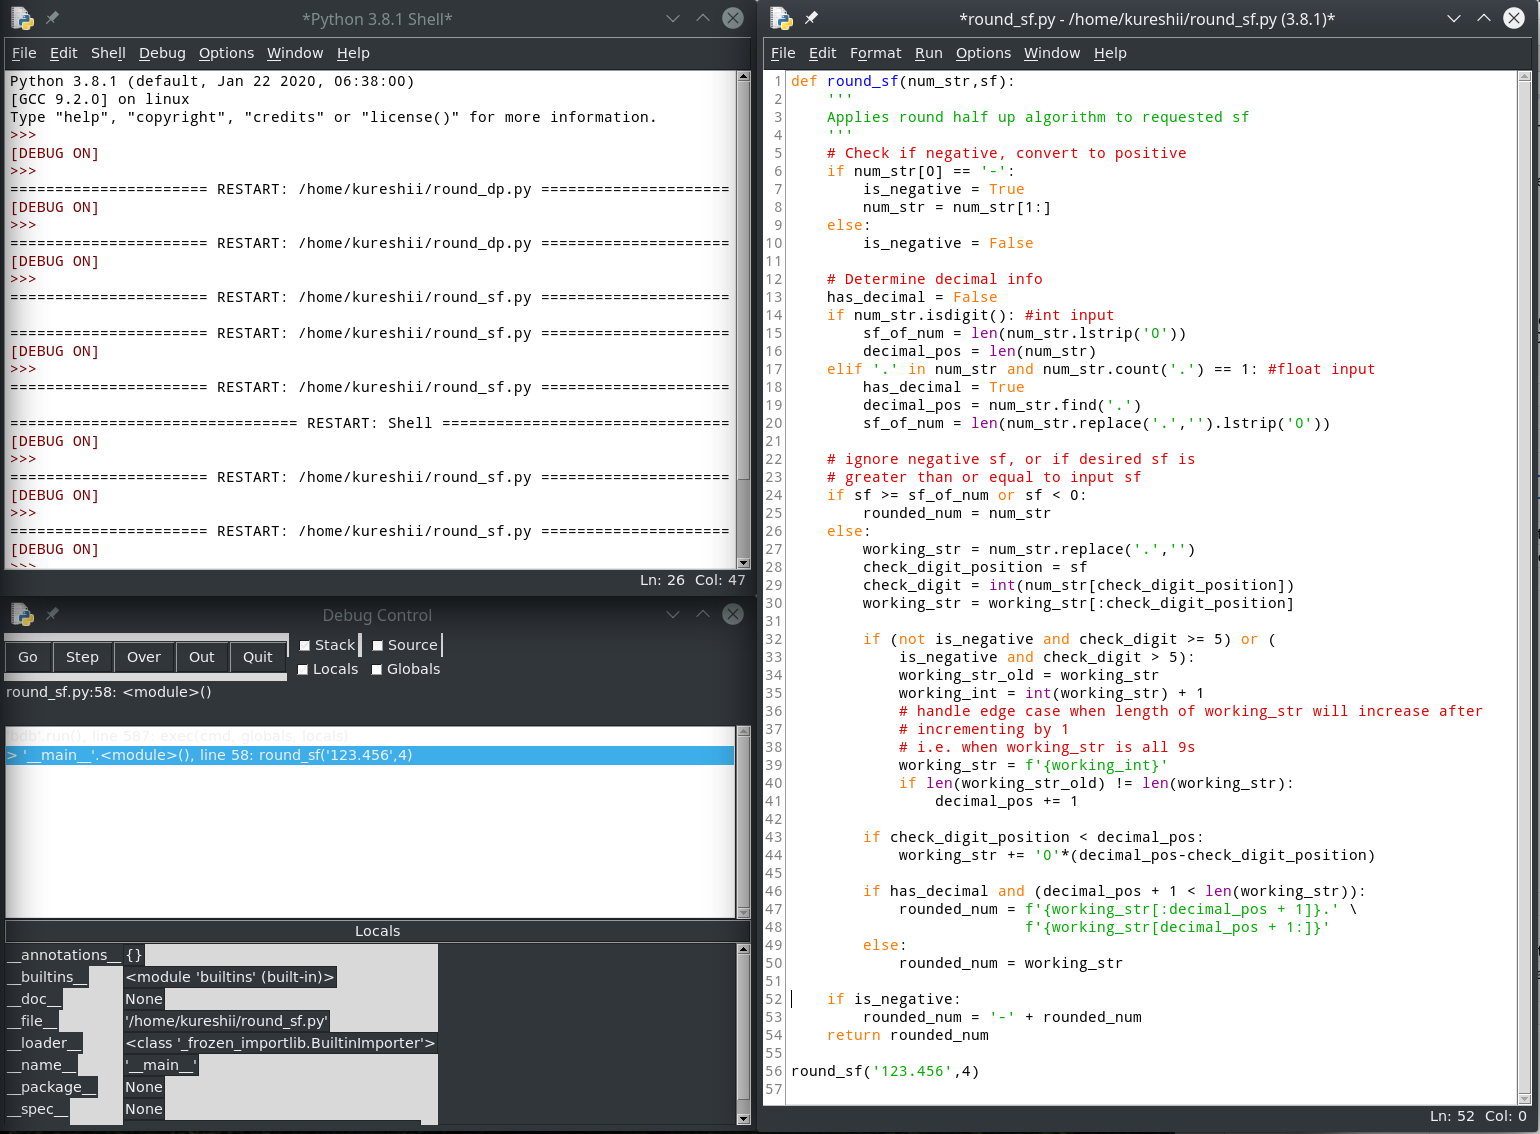

It is empty while there is no program running.

Once you start a program, it shows you the global space:

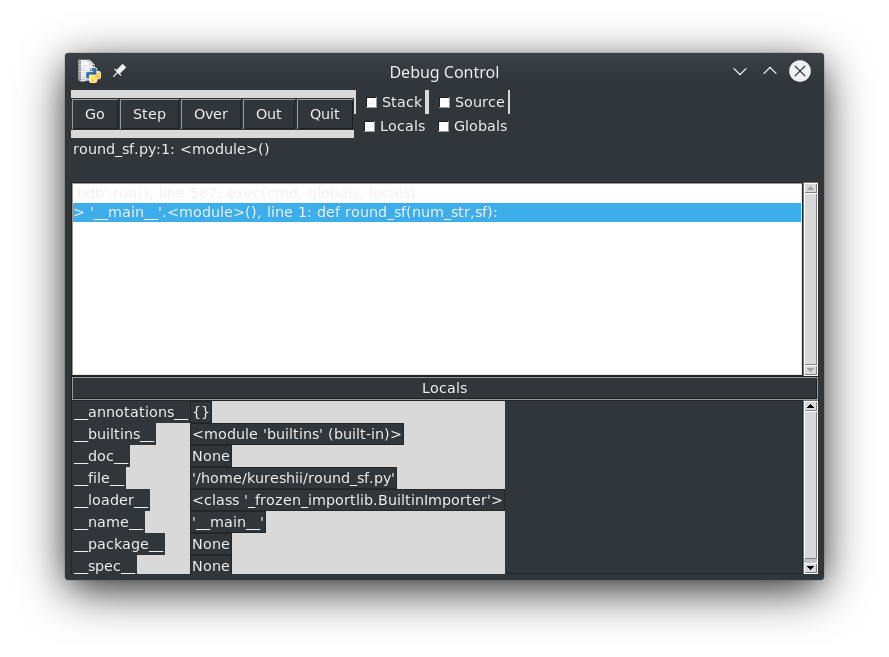

Theres not much going on here since no variables have been defined. The program is now at Line 1, the function definition.

In the top row, you see five buttons:

- `Go` will make the program run until it encounters a breakpoint, or the program finishes.
- `Step` will make the program advance to the next line, execute it, and pause again.
- `Quit` is self-explanatory.

The line below the buttons tells us we are in the global space (`<module>`). You can see that there are some global attributes, which we will not need.

Let’s click on `Step`.

You will see this:

    > '__main__'.<module>(), line 56: round_sf('123.456', 4)
    
The program has jumped past the function definition (without executing it, and is now at the line where we are about the call the function `round_sf('123.456', 4)`.

Let’s click `Step` again to enter the function exection.

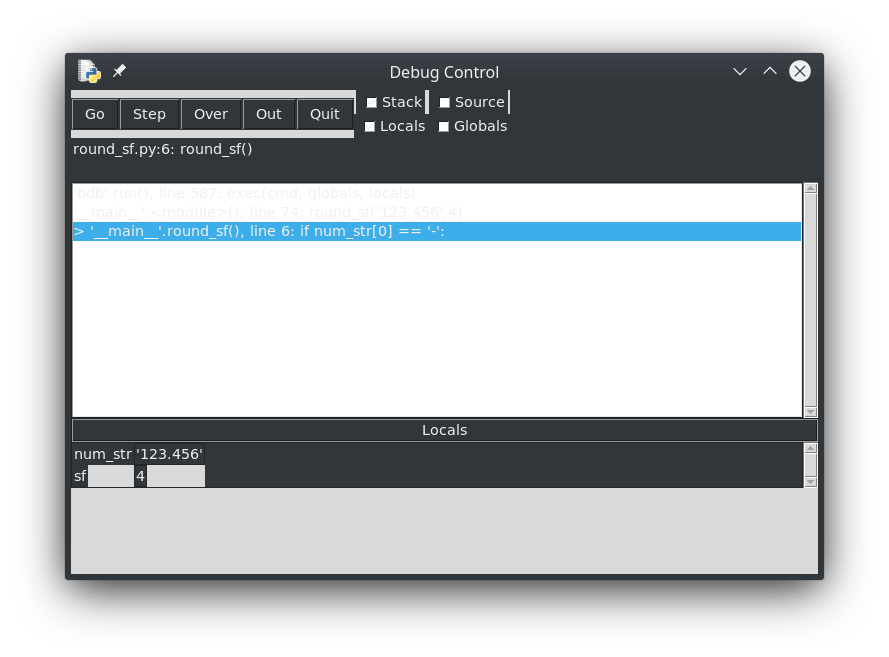

Not much happening here yet; we have just entered the function. The first line below the buttons tells us we are now in the local space of `round_sf()`. We only have two variables for now, `num_str` and `dp`, which came from the input parameters.

Let’s `step` until the part after the rounding is done, before zero padding:

    > '__main__'.round_sf(), line 43: if check_digit_position < decimal_pos:
    
By this point, we have set and modified quite a few variables. You can see them in the **Locals** box at the bottom. This box shows all the variables in the **local space** of the function.

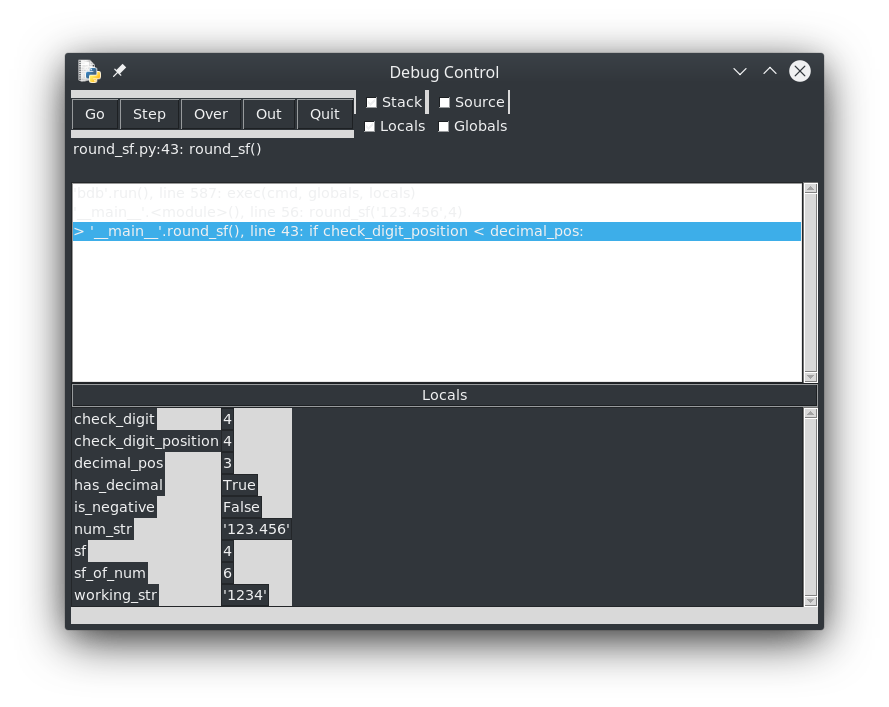

We can see the values of `check_digit`, `check_digit_position`, `decimal_pos`, `has_decimal`, and other local variables.

Of course, having to step manually and watch where to stop can get very tedious. This is where **breakpoints** come in.

In the code editor, right-click on any line to set a breakpoint. Here, I’ll seta breakpoint at line 43:

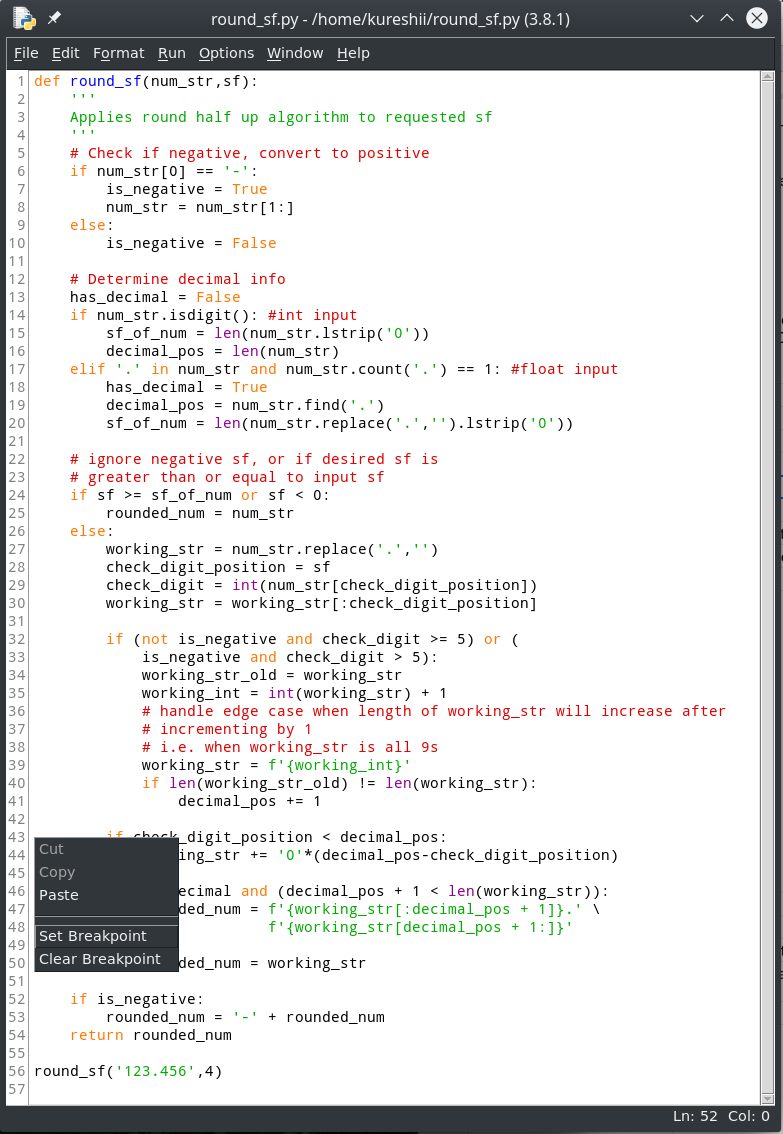

Breakpoints in IDLE are identified by a yellow highlight across the line.

Now, when we step into the debugger, we can click `Go` to go directly to the breakpoint.

There are two other buttons I have not explained:

- If you are on a line that has a function call, `Over` will prevent the debugger from stepping into the function. It will simply execute the function and get the return value.
- If you are in the local space of a function, `Out` will get the debugger to complete execution in the function without stopping, then pause again once it has exited the function.

## Debugging with `pdb`, the Python Debugger

The final tool available is `pdb`, the Python debugger. This is available both in Jupyter Notebook and in IDLE.

In Python 3.7 and later, you can use `pdb` simply by typing

    breakpoint()
    
on its own line whereever you want to set a breakpoint. When Python reaches that line, it will pause execution and enter `pdb`.

This feature is not availabler in earlier versions. Instead, you must type:

    import pdb; pdb.set_trace()

which will do the same thing.

Let’s try this with the same code. I will put `import pdb; pdb.set_trace()` on line 43:

In [ ]:
def round_sf(num_str, sf):
    '''
    Applies round half up algorithm to requested sf
    '''
    # Check if negative, convert to positive
    if num_str[0] == '-':
        is_negative = True
        num_str = num_str[1:]
    else:
        is_negative = False
    
    # Determine decimal info
    has_decimal = False
    if num_str.isdigit(): #int input
        sf_of_num = len(num_str.lstrip('0'))
        decimal_pos = len(num_str)
    elif '.' in num_str and num_str.count('.') == 1: #float input
        has_decimal = True
        decimal_pos = num_str.find('.')
        sf_of_num = len(num_str.replace('.','').lstrip('0'))
        
    # ignore negative sf, or if desired sf is
    # greater than or equal to input sf
    if sf >= sf_of_num or sf < 0: 
        rounded_num = num_str
    else:
        working_str = num_str.replace('.','')
        check_digit_position = sf
        check_digit = int(num_str[check_digit_position])
        working_str = working_str[:check_digit_position]

        if (not is_negative and check_digit >= 5) or (
            is_negative and check_digit > 5):
            working_str_old = working_str
            working_int = int(working_str) + 1
            # handle edge case when length of working_str will increase after
            # incrementing by 1
            # i.e. when working_str is all 9s
            working_str = f'{working_int}'
            if len(working_str_old) != len(working_str):
                decimal_pos += 1
            
        import pdb; pdb.set_trace()
        if check_digit_position < decimal_pos:
            working_str += '0'*(decimal_pos-check_digit_position)

        if has_decimal and (decimal_pos + 1 < len(working_str)):
            rounded_num = f'{working_str[:decimal_pos + 1]}.' \
                          f'{working_str[decimal_pos + 1:]}'
        else:
            rounded_num = working_str
            
    if is_negative:
        rounded_num = '-' + rounded_num
    return rounded_num

round_sf('123.456', 4)

If you run the cell above, you’ll see the following

    > <ipython-input-1-6735d5be189f>(44)round_sf()
    -> if check_digit_position < decimal_pos:

followed by an input prompt. This looks nothing like the IDLE debugger, but it is doing the same thing.

- You can type `dir()` to see all the variables in the local space.
- You can type the name of any variable to examine its value.
- You can type almost any one-line expression to run it. Try reassigning the value of one of the variables (just to see what happens)
- Advanced users can run list/set/tuple comprehensions to examine sets of data.
- Or write short for/while loops in one line.

We can perform the functions of `Go`, `Step`, `Over`, `Out`, `Quit` with the following commands:

- `Go`: **c** (continue)
- `Step`: **s** (step)
- `Over`: **n** (next)
- `Out`: **r** (return)
- `Quit`: **q** (quit or exit) → This will raise `BdbQuit` and exit the program

While in `pdb`, you can set a breakpoint with __b__ (breakpoint), or clear a breakpoint at that line with **cl** (clear).

To invoke the above commands, you can either type the **bolded** short form, or the full command (in parentheses).

See the Python Debugger documentation for the [full list of commands](https://docs.python.org/3.6/library/pdb.html#debugger-commands).